# DLCVNLP CLASS USE OF CALL BACKS , SAVING THE MODEL AND HOW TO LOAD THE SAVED MODEL

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

In [3]:
# creating the validation set and also scaling the values between 0 to 1
X_valid,X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000],y_train_full[5000:]

In [4]:
# Now the training data is scaled 

# Now scaling the testing data

X_test = X_test/255.0


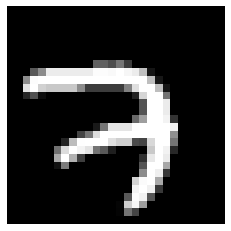

In [5]:
# Exploring the first data point of the X_train
plt.imshow(X_train[0],cmap="gray")
plt.axis("off")
plt.show()

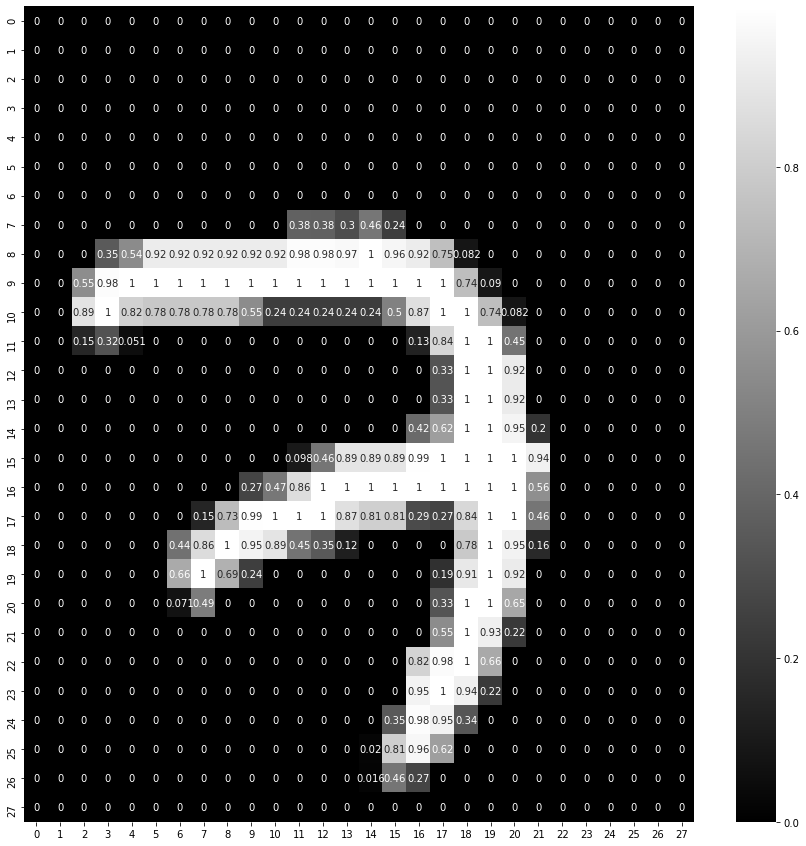

In [8]:
# let's draw the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],cmap="gray",annot=True)

In [9]:
# let's see the corresponding value of xtrain in ytrain 
y_train[0]

7

In [10]:
# Both are same ;)

In [11]:
# creating the sequential model
model = tf.keras.models.Sequential()

In [12]:
# Now we will add the layers to it

In [13]:
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [14]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = 'SGD'
METRICS = ['accuracy']
model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

# Tensorboard CallBack

In [36]:
# its usefull for showing more info of the logs created while doing epochs on the dashboard of the tensorboard

In [37]:
import time

def get_log_path(log_dir="logs/fit"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    log_path = os.path.join(log_dir,fileName)
    print(f"Savings logs at : {log_path} ")
    return log_path

log_dir = get_log_path()

tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Savings logs at : logs/fit\log_2021_05_22_16_43_55 


# Early stopping callbacks


In [38]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

# Model Checkpointing Callback

In [39]:
CKPT_path = "model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only = True)

In [40]:
EPOCHS = 50
VALIDATION_SET = (X_valid,y_valid)
history = model.fit(X_train,y_train , epochs = EPOCHS, validation_data=VALIDATION_SET,batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/50
   1/1719 [..............................] - ETA: 0s - loss: 2.3077 - accuracy: 0.1875WARNING:tensorflow:From E:\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5997 - accuracy: 0.8432 - val_loss: 0.3088 - val_accuracy: 0.9154
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2888 - accuracy: 0.9167 - val_loss: 0.2422 - val_accuracy: 0.9348
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2365 - accuracy: 0.9317 - val_loss: 0.2048 - val_accuracy: 0.9430
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2026 - accuracy: 0.9423 - val_loss: 0.1805 - val_accuracy: 0.9500
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step

In [41]:
# saving this model
import time 
import os

def savedModel_path(model_dir="TRAINED_MODEL"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"model {fileName} will be saved at {model_path}")
  return model_path 

In [42]:
UNIQUE_PATH = savedModel_path()
UNIQUE_PATH

model Model_2021_05_22_16_53_01_.h5 will be saved at TRAINED_MODEL\Model_2021_05_22_16_53_01_.h5


'TRAINED_MODEL\\Model_2021_05_22_16_53_01_.h5'

In [43]:
tf.keras.models.save_model(model, UNIQUE_PATH)

In [44]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.599730,0.843236,0.308759,0.9154
1,0.288807,0.916709,0.242218,0.9348
2,0.236518,0.931709,0.204753,0.9430
3,0.202628,0.942255,0.180463,0.9500
4,0.177000,0.949418,0.166843,0.9526
5,0.156621,0.954673,0.148660,0.9600
6,0.140718,0.959836,0.138394,0.9618
7,0.127478,0.963691,0.125689,0.9672
8,0.116058,0.967200,0.122116,0.9680
9,0.106394,0.969964,0.112405,0.9692


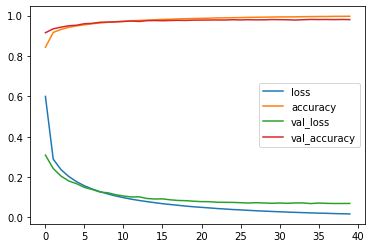

In [45]:
pd.DataFrame(history.history).plot()

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 781us/step - loss: 0.0687 - accuracy: 0.9783


[0.06870917975902557, 0.9782999753952026]

In [47]:
X_new = X_test[:3]

y_prob = model.predict(X_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [48]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

In [49]:
y_test_new = y_test[:3]
y_test_new

array([7, 2, 1], dtype=uint8)

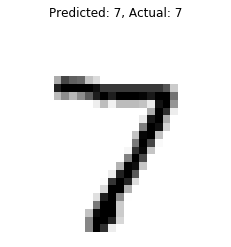

###########


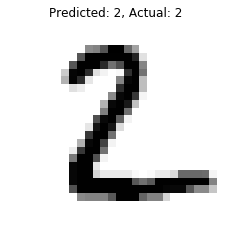

###########


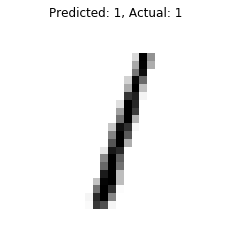

###########


In [50]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("###########")